In [129]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lars, ElasticNet, Lasso, Ridge, BayesianRidge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

%matplotlib inline
cf.go_offline()
pd.set_option('display.max_rows', 60)
# pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: "{:,.4f}".format(x))
pd.set_option('display.max_columns', 100)

In [220]:
#salchichas = pd.read_csv("PRUEBA_TECNICA/datasets/score_de_jamonosidad.csv")
calificar = pd.read_csv("PRUEBA_TECNICA/datasets/jamones_por_calificar.csv")

In [221]:
calificar.head(2)

,jamon,score,v1,v2,v3
0,29,nan,2383,59,1857
1,30,nan,1598,61,2696


In [131]:
salchichas.head(2)

,jamon,score,v1,v2,v3
0,1,10,1985,59.7000,2205
1,2,11,2855,55.0000,2096


In [132]:
cols = ['score','v1', 'v2', 'v3']

In [133]:
salchichas.describe()

,jamon,score,v1,v2,v3
count,28.0000,28.0000,28.0000,28.0000,28.0000
mean,14.5000,6.9643,"2,127.2143",58.2964,"2,132.9643"
std,8.2260,3.4799,499.1161,5.4573,367.7113
min,1.0000,0.0000,"1,414.0000",43.8000,"1,457.0000"
25%,7.7500,4.0000,"1,714.0000",54.7750,"1,887.7500"
50%,14.5000,6.5000,"2,106.0000",58.8500,"2,062.5000"
75%,21.2500,10.0000,"2,474.2500",61.1000,"2,427.2500"
max,28.0000,13.0000,"2,929.0000",68.5000,"2,876.0000"


In [134]:
for i in cols:
    salchichas[i].iplot(kind='box')

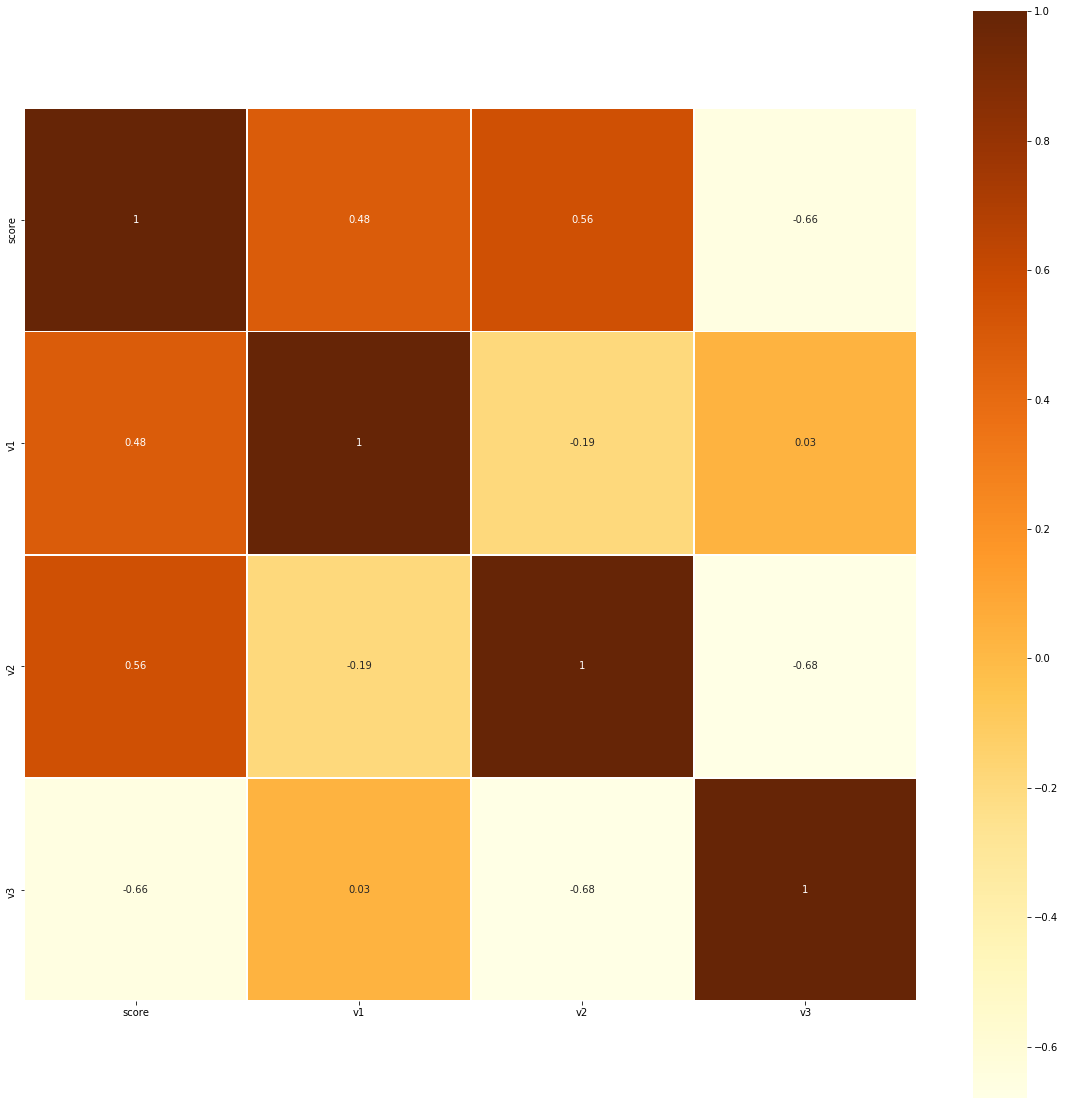

In [135]:
plt.figure(figsize=(20,20))
sns.heatmap(salchichas[cols].corr(),cmap="YlOrBr",linecolor='white',linewidths=1,square=True,annot=True)

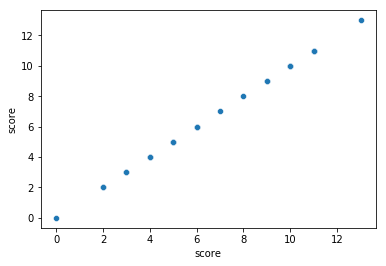

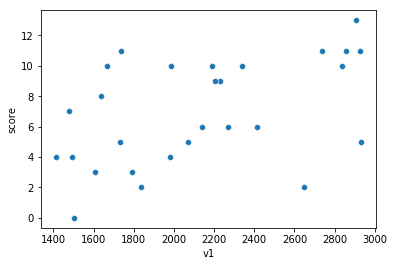

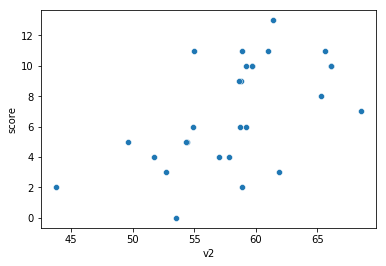

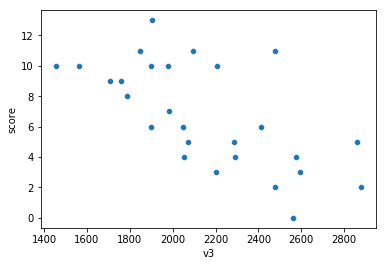

In [136]:
for i in cols:
    sns.scatterplot(y=salchichas['score'],x =salchichas[i])
    plt.show()

In [ ]:
for i in cols:
    print(i)
    stats.probplot(salchichas[i], dist="norm", plot=plt)
    plt.show()

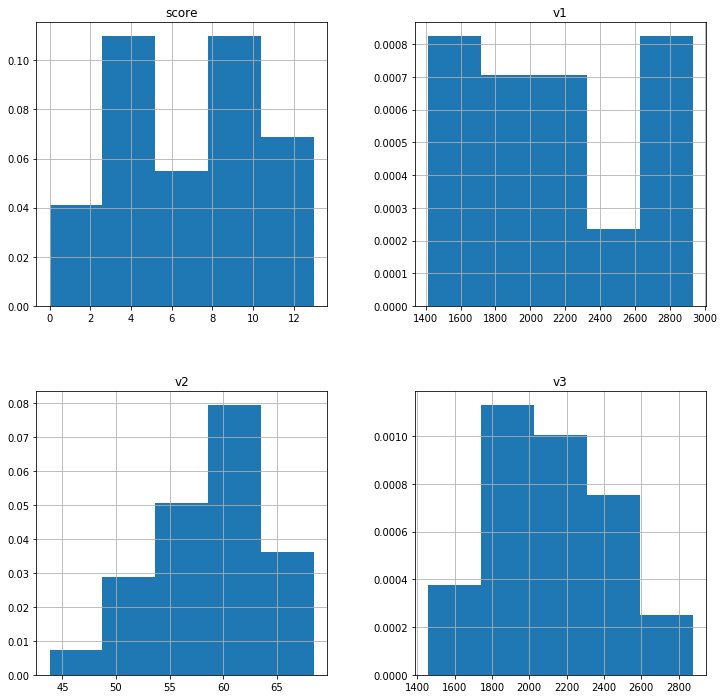

In [138]:
salchichas[cols].hist(bins=5, figsize=(12,12), density=True)
plt.show()

# Transform data

In [98]:
from itertools import combinations 

comb = combinations(['v1','v2','v3'], 2)
#for i in comb:
#    print(type(i[0]), i[1])

In [139]:
salchichas.head(2)

,jamon,score,v1,v2,v3
0,1,10,1985,59.7000,2205
1,2,11,2855,55.0000,2096


In [99]:
for j in comb:
    print(j)
    salchichas[j[0]+'/'+j[1]] = salchichas[j[0]]/salchichas[j[1]]
    salchichas[j[0]+'*'+j[1]] = salchichas[j[0]]*salchichas[j[1]]
    salchichas[j[0]+'+'+j[1]] = salchichas[j[0]]+salchichas[j[1]]
    salchichas[j[0]+'-'+j[1]] = salchichas[j[0]]-salchichas[j[1]]
    
    salchichas[j[1]+'/'+j[0]] = salchichas[j[1]]/salchichas[j[0]]
    salchichas[j[1]+'-'+j[0]] = salchichas[j[1]]-salchichas[j[0]]

('v1', 'v2')
('v1', 'v3')
('v2', 'v3')


In [90]:
for j in comb:
        salchichas[j[0]+'/'+j[1]] = salchichas[j[0]]/salchichas[j[1]]
        salchichas[j[0]+'*'+j[1]] = salchichas[j[0]]*salchichas[j[1]]
for i in ['v1','v2','v3']:
    salchichas['sin_'+i] = np.sin(salchichas[i])
    salchichas['cos_'+i] = np.cos(salchichas[i])
    salchichas['r2_'+i] = np.power(salchichas[i], 1/2)
    salchichas['r3_'+i] = np.power(salchichas[i], 1/3)
    salchichas['p2_'+i] = np.power(salchichas[i], 2)
    salchichas['p3_'+i] = np.power(salchichas[i], 3)
    salchichas['p4_'+i] = np.power(salchichas[i], 4)
    #salchichas['p5_'+i] = np.power(salchichas[i], 5)
    salchichas['ln_'+i] = np.log(salchichas[i])
    salchichas['boxcox_'+i], param = stats.boxcox(salchichas[i])
    if(i=='v1' or i=='v2'):
        continue
    salchichas['rec_'+i] = np.reciprocal(salchichas[i])
    
# salchichas['score'], param = stats.boxcox(salchichas['score']+1)

c:\python37\lib\site-packages\scipy\stats\morestats.py:902: RuntimeWarning:

divide by zero encountered in log

c:\python37\lib\site-packages\scipy\optimize\optimize.py:2315: RuntimeWarning:

invalid value encountered in double_scalars

c:\python37\lib\site-packages\scipy\optimize\optimize.py:1933: RuntimeWarning:

invalid value encountered in double_scalars

c:\python37\lib\site-packages\scipy\optimize\optimize.py:1934: RuntimeWarning:

invalid value encountered in double_scalars

c:\python37\lib\site-packages\scipy\optimize\optimize.py:1935: RuntimeWarning:

invalid value encountered in double_scalars

c:\python37\lib\site-packages\scipy\optimize\optimize.py:1936: RuntimeWarning:

invalid value encountered in double_scalars



In [140]:
for i in ['v1','v2','v3']:
    salchichas[f"p2_{i}"] = np.power(salchichas[i],2)
    salchichas[f"p3_{i}"] = np.power(salchichas[i],3)
    salchichas[f"p4_{i}"] = np.power(salchichas[i],4)

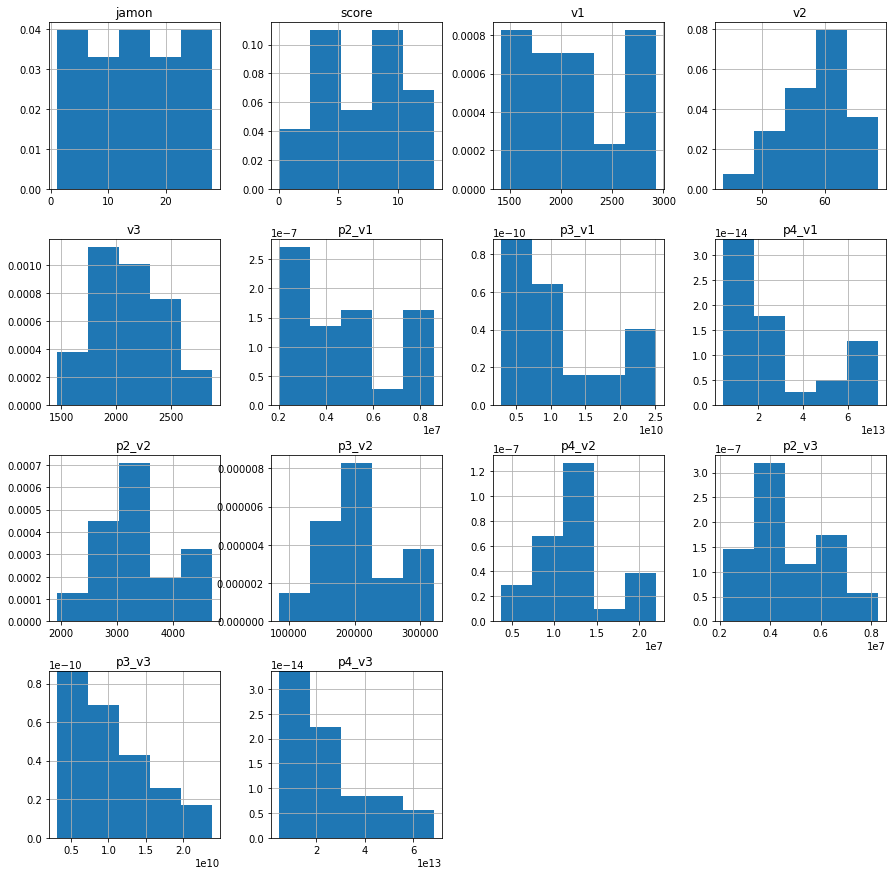

In [141]:
salchichas.hist(bins=5, figsize=(15,15), density=True)
plt.show()

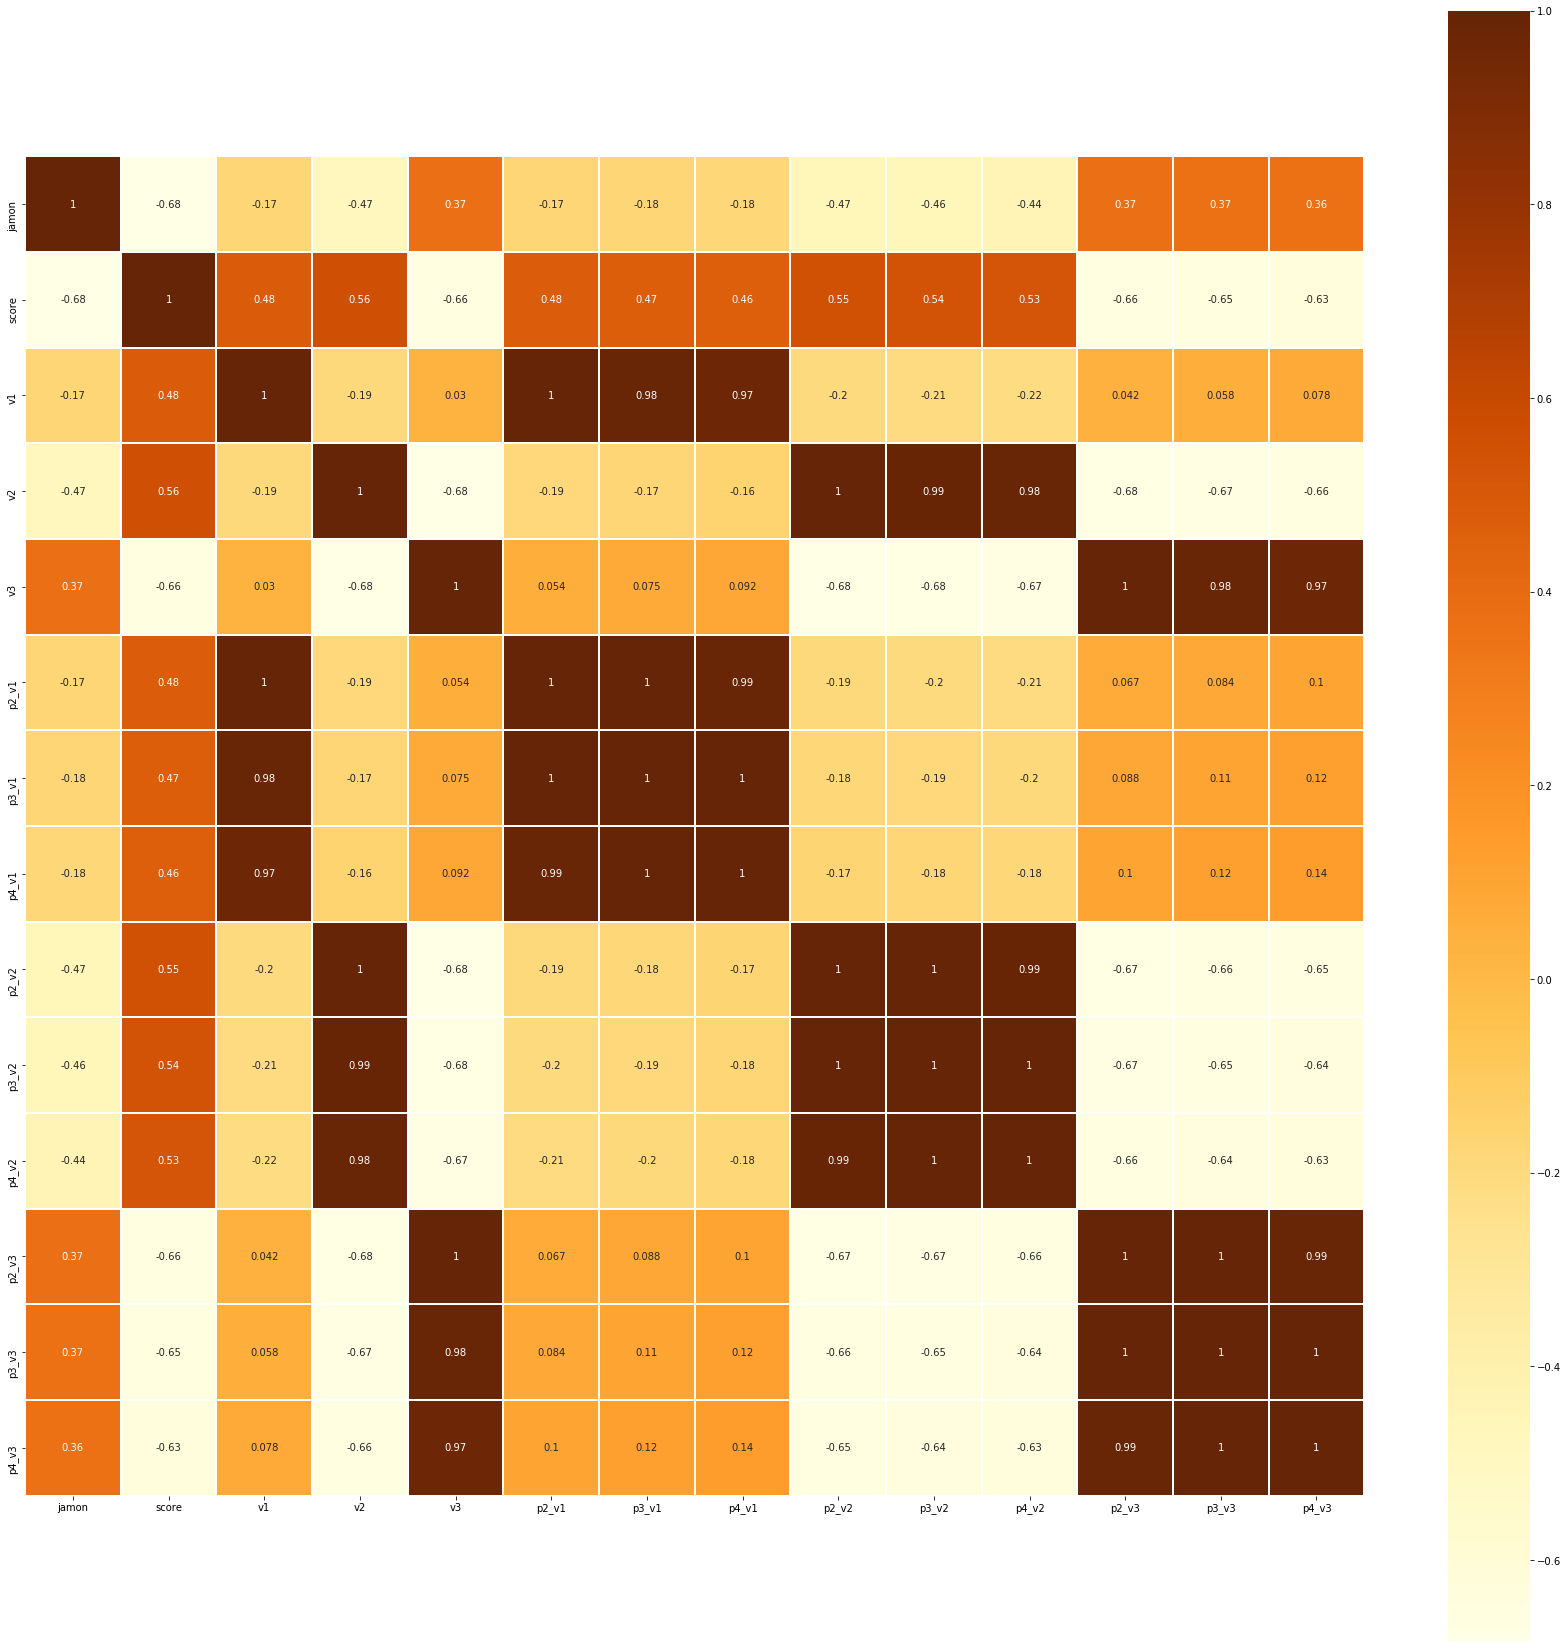

In [142]:
plt.figure(figsize=(30,30))
sns.heatmap(salchichas.corr(),cmap="YlOrBr",linecolor='white',linewidths=1,square=True,annot=True)

jamon


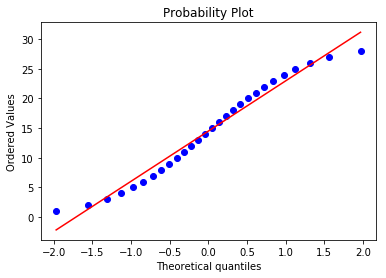

score


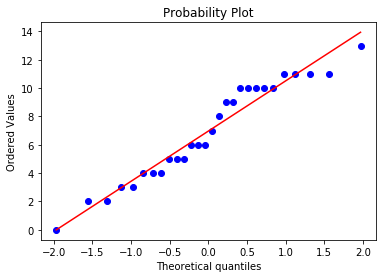

v1


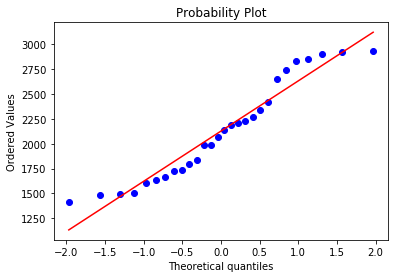

v2


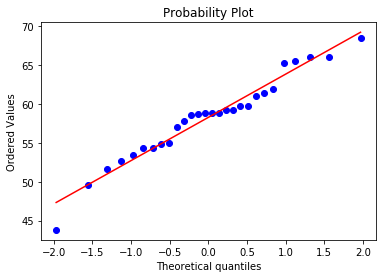

v3


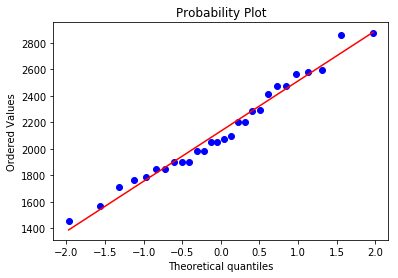

p2_v1


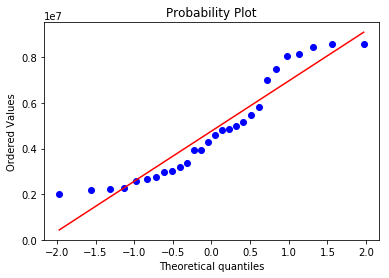

p3_v1


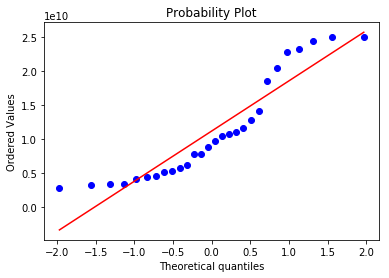

p4_v1


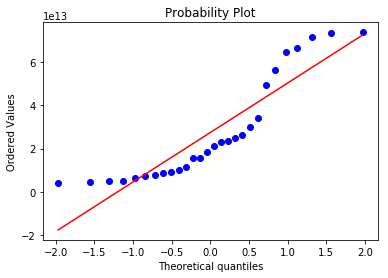

p2_v2


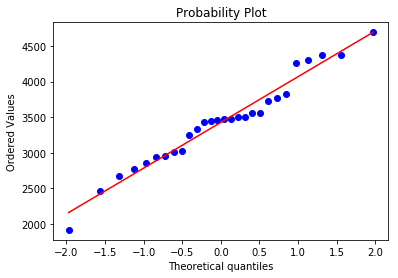

p3_v2


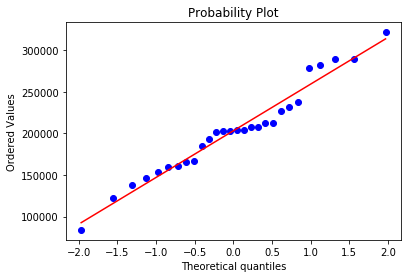

p4_v2


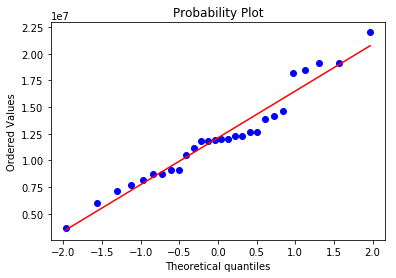

p2_v3


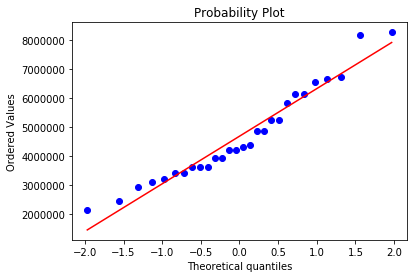

p3_v3


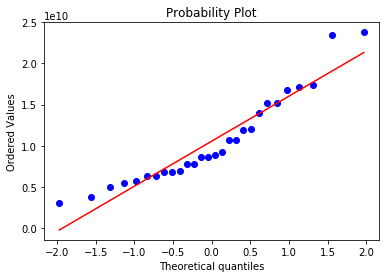

p4_v3


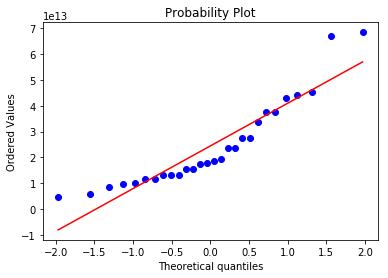

In [143]:
for i in salchichas.columns:
    print(i)
    stats.probplot(salchichas[i], dist="norm", plot=plt)
    plt.show()

In [145]:
salchichas.head(2)

,jamon,score,v1,v2,v3,p2_v1,p3_v1,p4_v1,p2_v2,p3_v2,p4_v2,p2_v3,p3_v3,p4_v3
0,1,10,1985,59.7000,2205,3940225,7821346625,15525373050625,"3,564.0900","212,776.1730","12,702,737.5281",4862025,10720765125,23639287100625
1,2,11,2855,55.0000,2096,8151025,23271176375,66439208550625,"3,025.0000","166,375.0000","9,150,625.0000",4393216,9208180736,19300346822656


In [146]:
salchichas.shape

(28, 14)

In [147]:
cols = [x for x in salchichas.columns if x not in ['jamon', 'score']]

In [148]:
indx = [0,2,8,9,12,16,18,21,23]

In [149]:
9/28

0.32142857142857145

In [150]:
X = salchichas[[x for x in salchichas.columns if x not in ['jamon','score']]].copy()
y = salchichas[['score']].copy()

In [151]:
kb = SelectKBest(k = 9, score_func=f_regression)
kb.fit(X, y.values.ravel())
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
ls_best

['v1', 'v2', 'v3', 'p2_v2', 'p3_v2', 'p4_v2', 'p2_v3', 'p3_v3', 'p4_v3']

In [197]:
with open('ls_best.sav', 'wb') as f:
	pickle.dump(ls_best, f)

In [152]:
ss_x = StandardScaler()
ss_y = StandardScaler()
ss_x.fit(X[ls_best])
ss_y.fit(y)
X = pd.DataFrame(ss_x.transform(X[ls_best]), columns=ls_best)
y = pd.DataFrame(ss_y.transform(y), columns=['score'])

In [198]:
with open('scaler_X.sav', 'wb') as f:
	pickle.dump(ss_x, f)
with open('scaler_y.sav', 'wb') as f:
	pickle.dump(ss_y, f)

In [153]:
X_train = X.loc[~X.index.isin(indx)].copy()
X_test = X.loc[X.index.isin(indx)].copy()
y_train = y.loc[~y.index.isin(indx),'score'].copy()
y_test = y.loc[y.index.isin(indx),'score'].copy()

In [163]:
elasticnet = ElasticNet(alpha=.2, l1_ratio=.2, max_iter=1000,tol=0.001, selection='random',random_state=0)
elasticnet.fit(X_train[ls_best], y_train.values.ravel())
display(elasticnet.score(X_train[ls_best], y_train))
display(r2_score(y_test, elasticnet.predict(X_test)))
#ls_res = cross_val_score(estimator=elasticnet, cv = 4, scoring="r2", X = X_train[ls_best], y = y_train, n_jobs=-1)
#np.mean(ls_res), np.std(ls_res)

0.813221872030033

0.6012640317906583

In [164]:
sgd = SGDRegressor(penalty='l2',alpha=.95,l1_ratio=0.1,max_iter=1000,random_state=0)
sgd.fit(X_train[ls_best], y_train.values.ravel())
display(sgd.score(X_train[ls_best], y_train))
display(r2_score(y_test, sgd.predict(X_test)))

0.7011018930088667

0.669105802306776

In [199]:
mlp = MLPRegressor(hidden_layer_sizes=(9,5,100), alpha=0.15,activation='tanh',solver='adam', learning_rate='invscaling',max_iter=65, random_state=0)
mlp.fit(X_train[ls_best], y_train.values.ravel())
display(mlp.score(X_train[ls_best], y_train))
display(r2_score(y_test, mlp.predict(X_test)))

c:\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (65) reached and the optimization hasn't converged yet.



0.7232894589835697

0.7242062912187286

In [200]:
with open('model_mlp.sav', 'wb') as f:
	pickle.dump(mlp, f)

In [172]:
mlp = MLPRegressor(hidden_layer_sizes=(9,5,100), alpha=0.1,activation='tanh',solver='adam', learning_rate='invscaling',max_iter=65, random_state=0)
mlp.fit(X_train[ls_best], y_train.values.ravel())
display(mlp.score(X_train[ls_best], y_train))
display(r2_score(y_test, mlp.predict(X_test)))

c:\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (65) reached and the optimization hasn't converged yet.



0.725209860064733

0.7226061831139313

In [168]:
models = [LinearRegression(),RandomForestRegressor(random_state=0, max_depth=2), XGBRegressor(random_state=0, max_depth=2),
          MLPRegressor(random_state=200, max_iter=200),
          ExtraTreesRegressor(random_state=0), Lasso(random_state=0), Ridge(random_state=0),
          Lars(random_state=0), ElasticNet(random_state=0), GradientBoostingRegressor(random_state=0),
          AdaBoostRegressor(random_state=0), SGDRegressor(random_state=0),
          DecisionTreeRegressor(random_state=0), KNeighborsRegressor(), SVR()]

In [169]:
def compare(X_train, y_train, X_test, y_test, models, scoring):
	for j in models:
		print(str(j).split('(')[0])
		model = j
		model.fit(X_train, y_train.values.ravel())
		display(model.score(X_train,y_train))
		display(r2_score(y_test, model.predict(X_test)))
		#ls_scores = cross_val_score(estimator=model, scoring=scoring, X=X_train, y=y_train, cv=4, n_jobs=-1)
		#print("Mean: ",np.mean(ls_scores), "std: ",np.std(ls_scores))
		#print("\n\n")

In [170]:
compare(X_train, y_train, X_test, y_test, models, "r2")

LinearRegression


0.86493417958422

0.3583053495338532

RandomForestRegressor


0.7966797968968267

0.5254206385132716

XGBRegressor


0.9907913411041884

0.37111943153724114

MLPRegressor


c:\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.9187692130998746

0.39641079828438586

ExtraTreesRegressor


1.0

0.33324673913043534

Lasso


0.0

-0.018818499337588834

Ridge


0.8355980498268368

0.525932160236805

Lars


-104593039.43009658

-463784346.1936907

ElasticNet


0.1757320346115956

0.18674450116147756

GradientBoostingRegressor


0.9999816128619656

0.2833268519850578

AdaBoostRegressor


0.9866398741530064

0.2147675120772946

SGDRegressor


0.8194473364923002

0.6071529056099136

DecisionTreeRegressor


1.0

0.17391304347826086

KNeighborsRegressor


0.605114813147231

0.5091304347826087

SVR


0.8175039669216441

0.6390368484358775

# Predecir calificación

In [210]:
def poly_(df):
    df = df.copy()
    for i in ['v1','v2','v3']:
        df[f"p2_{i}"] = np.power(df[i],2)
        df[f"p3_{i}"] = np.power(df[i],3)
        df[f"p4_{i}"] = np.power(df[i],4)
    return df.copy()

In [211]:
df = poly_(calificar)

In [212]:
calificar.head(2)

,jamon,score,v1,v2,v3
0,29,nan,2383,59,1857
1,30,nan,1598,61,2696


In [213]:
df.head(2)

,jamon,score,v1,v2,v3,p2_v1,p3_v1,p4_v1,p2_v2,p3_v2,p4_v2,p2_v3,p3_v3,p4_v3
0,29,nan,2383,59,1857,5678689,13532315887,32247508758721,3481,205379,12117361,3448449,6403769793,11891800505601
1,30,nan,1598,61,2696,2553604,4080659192,6520893388816,3721,226981,13845841,7268416,19595649536,52829871149056


In [214]:
with open("ls_best.sav", 'rb') as f:
	cols = pickle.load(f)

['v1', 'v2', 'v3', 'p2_v2', 'p3_v2', 'p4_v2', 'p2_v3', 'p3_v3', 'p4_v3']

In [215]:
with open("scaler_X.sav", 'rb') as f:
	scaler_X = pickle.load(f)

In [216]:
with open("scaler_y.sav", 'rb') as f:
	scaler_y = pickle.load(f)

In [217]:
with open("model_mlp.sav", 'rb') as f:
	model = pickle.load(f)

In [186]:
X = pd.DataFrame(scaler_X.transform(df[cols]), columns=cols)

In [218]:
calificar['score'] = np.round(scaler_y.inverse_transform(model.predict(X)),0)

In [219]:
calificar.head(5)

,jamon,score,v1,v2,v3
0,29,9.0000,2383,59,1857
1,30,3.0000,1598,61,2696
2,31,11.0000,2883,67,1865
3,32,5.0000,2898,56,2822
4,33,8.0000,2877,44,1553


In [222]:
class regression_salchichas:
    def __init__(self, df):
        with open("ls_best.sav", 'rb') as f:
            self.cols = pickle.load(f)
        with open("scaler_X.sav", 'rb') as f:
            self.scaler_X = pickle.load(f)
        with open("scaler_y.sav", 'rb') as f:
            self.scaler_y = pickle.load(f)
        with open("model_mlp.sav", 'rb') as f:
            self.model = pickle.load(f)
        self.df = poly_(df)
        
    def poly_(self,df):
        df = df.copy()
        for i in ['v1','v2','v3']:
            df[f"p2_{i}"] = np.power(df[i],2)
            df[f"p3_{i}"] = np.power(df[i],3)
            df[f"p4_{i}"] = np.power(df[i],4)
        return df.copy()

    def predict(self):
        X = pd.DataFrame(self.scaler_X.transform(self.df[self.cols]), columns=self.cols)
        return np.round(self.scaler_y.inverse_transform(self.model.predict(X)),0)

In [223]:
reg = regression_salchichas(calificar)

In [224]:
calificar['score'] = reg.predict()

In [225]:
calificar.head(2)

,jamon,score,v1,v2,v3
0,29,9.0000,2383,59,1857
1,30,3.0000,1598,61,2696
